## Generate random variables

a) Generate 1000 independent samples from Normal distribution with mean $\mu = 0$ and variance $\sigma^2 = 1$. Plot and visualize the data.

(Hint: Generate Gaussian samples from uniform random variables.)


In [3]:
import numpy as np
import pandas as pd

In [4]:
from numpy import random, sqrt, log, sin, cos, pi
from pylab import show,hist,subplot,figure

(array([  4.,  22.,  63., 172., 265., 236., 153.,  60.,  22.,   3.]),
 array([-3.28545936, -2.62215734, -1.95885532, -1.2955533 , -0.63225129,
         0.03105073,  0.69435275,  1.35765477,  2.02095679,  2.68425881,
         3.34756082]),
 <a list of 10 Patch objects>)

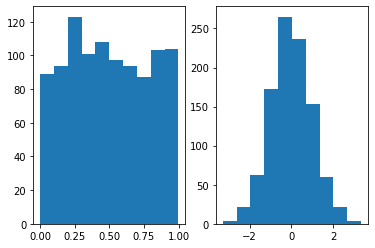

In [5]:
from scipy.stats import norm
data = np.random.uniform(0.0,1.0,1000)
data_arr = np.array(data)
vals = norm.ppf(data_arr)
figure()
subplot(121)
hist(data)
subplot(122)
hist(vals)

### Generate correlated random variables

b) Generate 1000 independent samples from Bivariate Normal distribution with means $\mu_{X} = \mu_{Y} = 0$, variances $\sigma_{X}^2 = \sigma_{Y}^2 = 1$ and correlation coefficient $\rho = - 0.9$. Plot and visualize the data in 2D and 3D.

(Hint: If (X,Y) is Bivariate Normal with $\mu_X = \mu_Y = 0$, $\sigma_X^2 = \sigma^2_Y = 1$ and correlation coefficient $\rho$, then the conditional distribution of $Y$ (conditioned on $X = x$) is Normal with mean $\rho x$ and variance $1 - \rho^2$, i.e., $Y|_{X = x} \sim {\mathcal N}(\rho x, 1 - \rho^2)$.)


In [6]:
mean = [0, 0]
cov = [[1, -0.9], [-0.9, 1]]

In [7]:
x,y = np.random.multivariate_normal(mean, cov, 1000).T

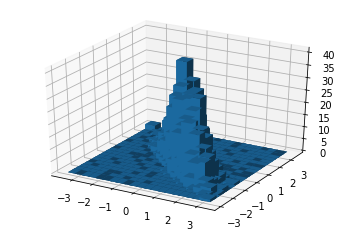

In [8]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x, y, bins=20)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np
from scipy.stats import multivariate_normal
var = multivariate_normal(mean=[0,0], cov=[[1, -0.9], [-0.9, 1]])
X, Y = np.meshgrid(x, y)
Z=[0]*1000 
for i in range(1000):
   Z[i]= var.pdf([x[i],y[i]])

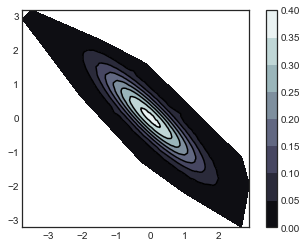

In [12]:
fig1, ax1 = plt.subplots()
ax1.set_aspect('equal')
tcf = ax1.tricontourf(x,y,Z,cmap=plt.get_cmap('bone'))
fig1.colorbar(tcf)
ax1.tricontour(x,y,Z,colors='k')

## Estimate correlation coefficient

The file 'data_corr.csv' has 1000 independent samples from a Bivariate Normal distribution with means $\mu_X = \mu_Y = 0$, variances $\sigma_X^2 = \sigma_Y^2 = 1$ and unknown correlation coefficient $\rho$.

c) Load the data from the file 'data_corr.npz'. Plot and visualize the marginal and joint distributions of $X$ and $Y$.

d) Comment on the nature of correlation observed in the data.

In [14]:
import pandas as pd

In [15]:
df1 = pd.read_csv('data_corr.csv')

In [16]:
df1.dtypes

X     float64
Y     float64
dtype: object

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [18]:
df1.corr()

,X,Y
X,1.000000,0.228125
Y,0.228125,1.000000


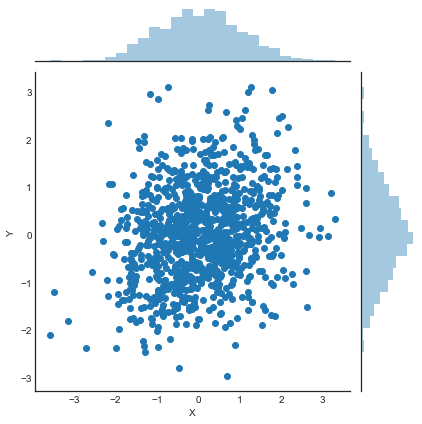

In [20]:
sns.jointplot(df1['X'],df1['Y '])

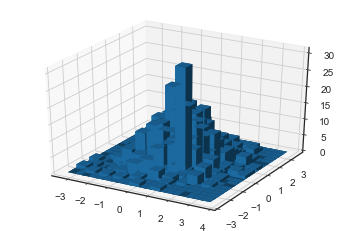

In [21]:
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(df1['X'], df1['Y '], bins=20)

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

### Maximum Likelihood Estimate using Grid Search

e) Let ${\mathsf P}_{\rho}(\mathbf{X} = \mathbf{x}, \mathbf{Y} = \mathbf{y})$ denote the likelihood function (for the observation $(\mathbf{x}, \mathbf{y})$, as a function of the parameter $\rho$). Compute the likelihood function for the given data and find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using grid search.

(Hint: Plot ${\mathsf P}_{\rho}(\cdot,\cdot)$ as a function of $\rho$.)

0.22999999999999998


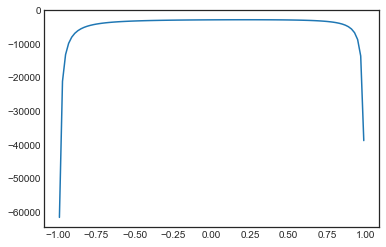

In [23]:
import numpy as np
# P = (1/(2*(np.pi)*np.sqrt(1-(rho**2))))*((e**(-(x**2)-(y**2)+(2*rho*x*y)))/(2(1-(rho**2))))
rho_arr = np.linspace(-0.99,0.99, num=100)
likelihood_arr = []
max_likelihood = -10000000
rho_max = rho_arr[0]
for rho in rho_arr:
    f = 0
    for row in df1.iterrows():
        f = f + (-row[1]['X']**2) + (-row[1]['Y ']**2) + (2*rho*row[1]['X']*row[1]['Y '])
    likelihood = ((-1000*np.log(2*(np.pi)*np.sqrt(1-(rho**2))))+(f/(2*(1-(rho**2)))))
    likelihood_arr.append(likelihood)
plt.plot(rho_arr,likelihood_arr)
rho_max = rho_arr[likelihood_arr.index(max(likelihood_arr))]
print(rho_max)

### Maximum Likelihood Estimate using Gradient Descent

f) Find the maximum likelihood estimate of $\rho$, $\hat{\rho}_{ML}$, using gradient descent. Plot the estimate of $\rho$ (versus iteration) for different choices of step size (e.g., 0.001, 0.01, 0.1).

In [24]:
rho_list, y_list = [], []
def grad_desc(rho_new, rho_prev,y_new, y_prev, precision=0.0001, l_r=0.0001):
    # keep looping until your desired precision
    if abs(y_new - y_prev) < precision:
        return(rho_new)
    else:    
        # change the value of x
        rho_prev = rho_new
        y_prev = y_new
        # get the derivation of the old value of x
        d_x = grad(rho_prev)

        # get your new value of x by adding the previous, the multiplication of the derivative and the learning rate
        rho_new = rho_prev + (l_r * d_x)

        # append the new value of x to a list of all x-s for later visualization of path
        rho_list.append(rho_new)

        # append the new value of y to a list of all y-s for later visualization of path
        y_new = func(rho_new)
        y_list.append(y_new)
        return(grad_desc(rho_new,rho_prev,y_new,y_prev))

def func(rho):
    f = 0
    for row in df1.iterrows():
        f = f + (-row[1]['X']**2) + (-row[1]['Y ']**2) + (2*rho*row[1]['X']*row[1]['Y '])
    likelihood = ((-1000*np.log(2*(np.pi)*np.sqrt(1-(rho**2))))+(f/(2*(1-(rho**2)))))
    return(likelihood)

def grad(rho):
    f = 0
    for row in df1.iterrows():
        f = f + (((row[1]['X']*row[1]['Y '])*(1+(rho**2)) - rho*((row[1]['X']**2) + (row[1]['Y ']**2)))/((1-(rho**2))**2))
    return((1000*rho/(1-(rho**2)))+f)

rho_max = grad_desc(0,0.99,func(0),func(0.99))
print(rho_max)

0.22853517859928105


### Maximum Likelihood Estimate (Analysis)

g) Find the maximum likelihood estimate of $\rho, \hat{\rho}_{ML}$ analytically (from the likelihood function).

In [25]:
def xy():
   f = 0
   for row in df1.iterrows():
       f = f + (row[1]['X']*row[1]['Y '])
   return(f)
def sum_sq():
   f = 0
   for row in df1.iterrows():
       f = f + ((row[1]['X']**2) + (row[1]['Y ']**2))
   return(f)
p1 = -xy()
p2 = sum_sq()-1000
sols = np.roots([1000,p1,p2,p1])
likelihood_arr = []
for sol in np.real(sols):
   f = 0
   for row in df1.iterrows():
       f = f + (-row[1]['X']**2) + (-row[1]['Y ']**2) + (2*sol*row[1]['X']*row[1]['Y '])
   likelihood = ((-1000*np.log(2*(np.pi)*np.sqrt(1-(sol**2))))+(f/(2*(1-(sol**2)))))
   likelihood_arr.append(likelihood)
rho_max = sols[likelihood_arr.index(max(likelihood_arr))]
print(rho_max)


(0.22929150491755718+0j)


### Simple Linear Regression

h) Using linear regression, seek a relation between $Y$ and $X$ (i.e., express $Y$ as a linear function of $X$). Comment.

In [26]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

In [28]:
lm = linear_model.LinearRegression()
y =np.array(df1["Y "]).reshape(df1.shape[0],1)
x =np.array(df1["X"]).reshape(df1.shape[0],1)
model = lm.fit(x,y)
print(model.coef_)
print(model.intercept_)

[[0.22209297]]
[0.02388922]


## Polynomial Regression

Load the two dimensional data from the file 'data_poly1.npz'.

i) Plot the data and comment on the relation between $X$ and $Y$ (plot $Y$ as a function of $X$).

In [29]:
a = np.load("data_poly1.npz")
Y =np.array(a["y"]).reshape(len(a['y']),1)
X =np.array(a["x"]).reshape(len(a['x']),1)

In [30]:
len(a['x'])

10

In [31]:
Y

array([[137.30104493],
       [ 30.27196401],
       [ 41.39087638],
       [100.52268636],
       [ 73.17271168],
       [ 70.65513882],
       [ 12.58840376],
       [ 40.1882022 ],
       [  7.03865692],
       [ 31.62571764]])

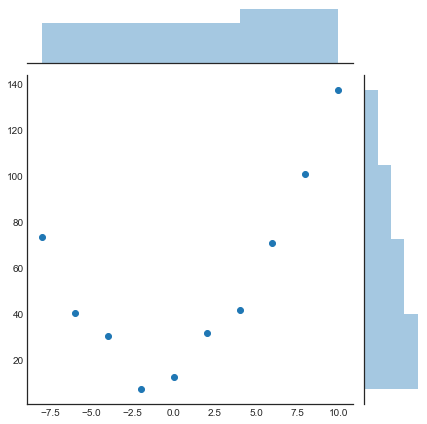

In [32]:
sns.jointplot(X,Y)

### Polynomial Regression using Scikit-learn Libraries

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### Degree 1 (Linear)

j) Using linear regression, seek a relation between $Y$ and $X$. Plot the function and report the mean square error.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=1)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
from sklearn.metrics import mean_squared_error, r2_score
# X_poly_test = poly_reg.fit(X_test)
y_poly_pred = pol_reg.predict(X_poly)
mse = (mean_squared_error(Y,y_poly_pred)) 
r2 = r2_score(Y,y_poly_pred)
print(mse) 
print(r2)

977.1734445909717
0.35199933262750516


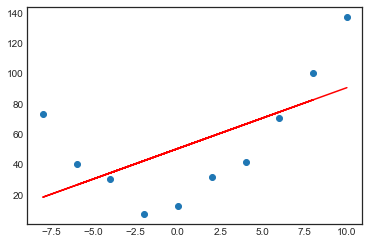

In [38]:
plt.scatter(X,Y)
plt.plot(X,y_poly_pred, '-r')

### Degree 2 (Quadratic)

k) Using polynomial regression of degree 2, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

In [39]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# X_poly_test = poly_reg.fit(X_test)
y_poly_pred = pol_reg.predict(X_poly)
mse = (mean_squared_error(Y,y_poly_pred)) 
r2 = r2_score(Y,y_poly_pred)
print(mse) 
print(r2)

24.846331727808156
0.9835234577540967


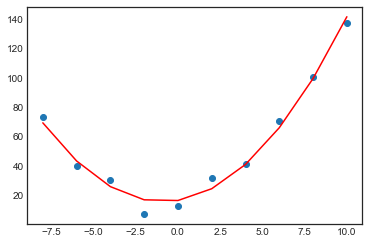

In [43]:
import operator
plt.scatter(X,Y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')

### Degree 9

l) Using polynomial regression of degree 9, seek a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree=9)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
# X_poly_test = poly_reg.fit(X_test)
y_poly_pred = pol_reg.predict(X_poly)
mse = (mean_squared_error(Y,y_poly_pred)) 
r2 = r2_score(Y,y_poly_pred)
print(mse) 
print(r2)

2.9836029474310285e-13
0.9999999999999998


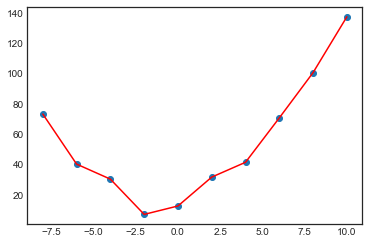

In [46]:
import operator
plt.scatter(X,Y)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='r')

### Training Error

m) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data.

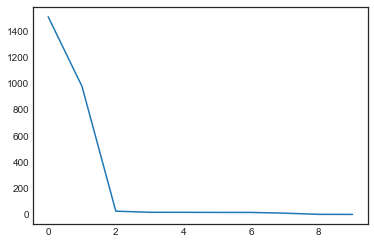

In [48]:
degree = [0,1,2,3,4,5,6,7,8,9]
error = []
for deg in degree:
   polynomial_features= PolynomialFeatures(degree= deg)
   x_poly = polynomial_features.fit_transform(X)

   model = LinearRegression()
   model.fit(x_poly, Y)
   y_poly_pred = model.predict(x_poly)

   mse = (mean_squared_error(Y,y_poly_pred))
   error.append(mse)
plt.plot(degree,error)

### Test error

Load 'data_poly2.npz'. The data points in the file are from the same sample as 'data_poly1.npz'.

n) Plot the mean square error (for degrees 0,1,...,9) for the test data set, for the polynomial fit obtained with the training data set 'data_poly1.npz'. Now, comment on the best model for data.

(Hint: Plot Training error and Testing error in the same plot.)

In [52]:
data = np.load("data_poly2.npz")


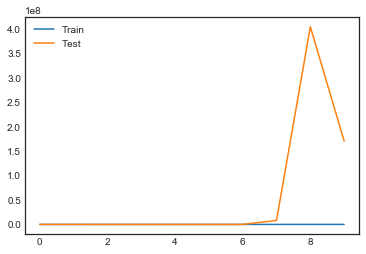

In [53]:
degree = [0,1,2,3,4,5,6,7,8,9]
error_test = []
error_train = []
for deg in degree:
   polynomial_features= PolynomialFeatures(degree= deg)
   x_train_poly = polynomial_features.fit_transform(X)
   model = LinearRegression()
   model.fit(x_train_poly, Y)
   y_train_poly_pred = model.predict(x_train_poly)
   x_test_poly = polynomial_features.fit_transform(data['x'].reshape(-1, 1))
   y_test_poly_pred = model.predict(x_test_poly)
   mse_train = (mean_squared_error(Y,y_train_poly_pred))
   error_train.append(mse_train)
   mse_test = (mean_squared_error(data['y'].reshape(-1, 1),y_test_poly_pred))
   error_test.append(mse_test)
plt.plot(degree,error_train)
plt.plot(degree,error_test)
plt.legend(['Train', 'Test'], loc='upper left')